# Starbucks Product Nutritional Insights

## Libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [5]:
sns.set_style("darkgrid")

In [11]:
df = pd.read_csv("starbucks.csv", index_col=0)

In [153]:
df = pd.read_csv("starbucks.csv", index_col=0)

# Observing missing data
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_summary = pd.DataFrame({
    'Number of Missing Values': missing_data,
    'Percentage of Missing Value (%)': missing_percentage
})

print(missing_summary)

          Number of Missing Values  Percentage of Missing Value (%)
item                             0                              0.0
calories                         0                              0.0
fat                              0                              0.0
carb                             0                              0.0
fiber                            0                              0.0
protein                          0                              0.0
type                             0                              0.0


In [15]:
df.head()

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 1 to 77
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      77 non-null     object 
 1   calories  77 non-null     int64  
 2   fat       77 non-null     float64
 3   carb      77 non-null     int64  
 4   fiber     77 non-null     int64  
 5   protein   77 non-null     int64  
 6   type      77 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.8+ KB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,338.831169,105.368701,80.0,300.0,350.0,420.0,500.0
fat,77.0,13.766234,7.095488,0.0,9.0,13.0,18.0,28.0
carb,77.0,44.870130,16.551634,16.0,31.0,45.0,59.0,80.0
fiber,77.0,2.220779,2.112764,0.0,0.0,2.0,4.0,7.0
protein,77.0,9.480519,8.079556,0.0,5.0,7.0,15.0,34.0


In [23]:
df["item"].nunique()

77

In [25]:
df["item"].unique()

array(['8-Grain Roll', 'Apple Bran Muffin', 'Apple Fritter',
       'Banana Nut Loaf', 'Birthday Cake Mini Doughnut',
       'Blueberry Oat Bar', 'Blueberry Scone',
       'Bountiful Blueberry Muffin', 'Butter Croissant ', 'Cheese Danish',
       'Chocolate Chunk Cookie', 'Chocolate Cinnamon Bread',
       'Chocolate Croissant', 'Chocolate Old-Fashioned Doughnut',
       'Chonga Bagel', 'Cinnamon Chip Scone', 'Cranberry Orange Scone',
       'Double Chocolate Brownie', 'Double Fudge Mini Doughnut',
       'Everything with Cheese Bagel', 'Ginger Molasses Cookie',
       'Iced Lemon Pound Cake', 'Mallorca Sweet Bread',
       'Maple Oat Pecan Scone ', 'Marble Pound Cake',
       'Marshmallow Dream Bar', 'Morning Bun', 'Multigrain Bagel',
       'Old-Fashioned Glazed Doughnut', 'Outrageous Oatmeal Cookie',
       'Petite Vanilla Bean Scone', 'Plain Bagel', 'Pumpkin Bread',
       'Pumpkin Scone ', 'Raspberry Scone', 'Raspberry Swirl Pound Cake',
       'Reduced-Fat Banana Chocolate Chip C

In [27]:
df["type"].unique()

array(['bakery', 'bistro box', 'petite', 'hot breakfast', 'salad',
       'sandwich', 'parfait'], dtype=object)

In [31]:
df.groupby("type")["item"].count()

type
bakery           41
bistro box        8
hot breakfast     8
parfait           3
petite            9
salad             1
sandwich          7
Name: item, dtype: int64

In [35]:
df.groupby("type")[["item"]].count()

,item
type,
bakery,41
bistro box,8
hot breakfast,8
parfait,3
petite,9
salad,1
sandwich,7


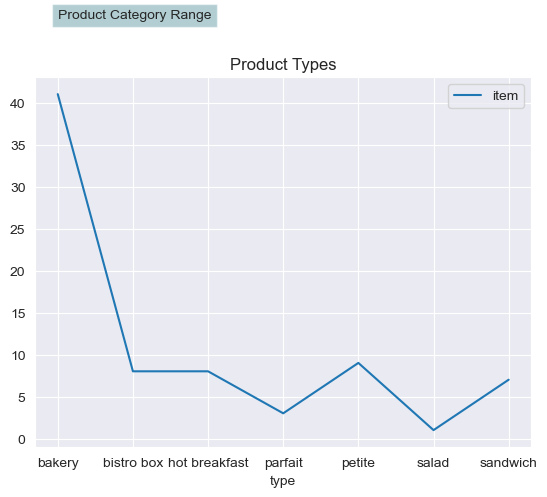

In [39]:
df.groupby("type")[["item"]].count().plot()
plt.title("Product Types")
plt.text(0.,50,"Product Category Range", bbox=dict(facecolor="#669EA6", alpha=0.5))
plt.show()

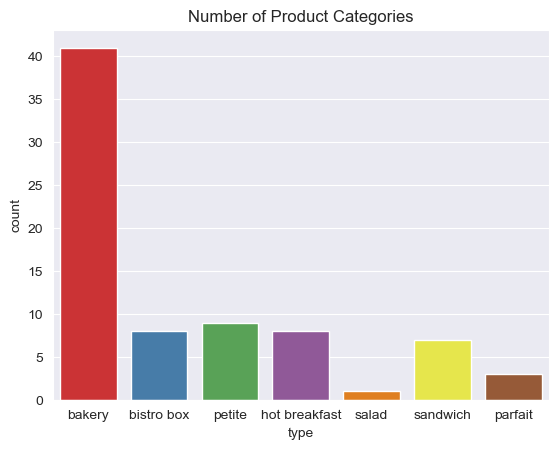

In [43]:
sns.countplot(x = "type", data = df, palette = "Set1")
plt.title("Number of Product Categories")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


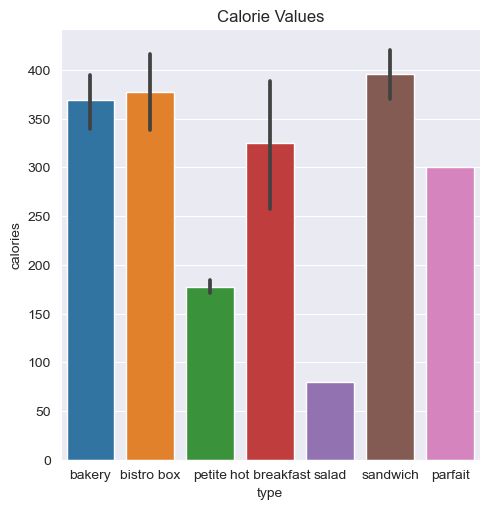

In [57]:
sns.catplot(kind = "bar", x = "type", y = "calories", data = df)
plt.title("Calorie Values")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


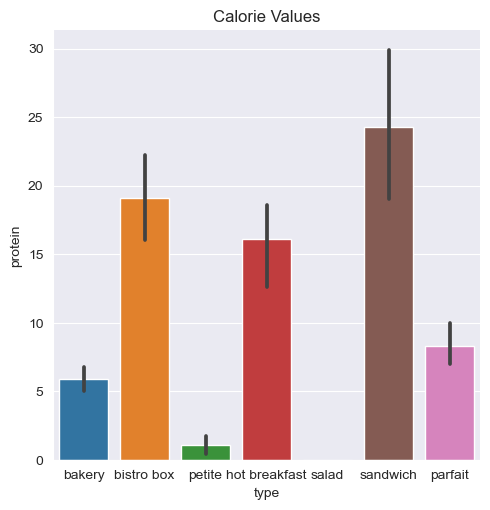

In [59]:
sns.catplot(kind = "bar", x = "type", y = "protein", data = df)
plt.title("Calorie Values")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


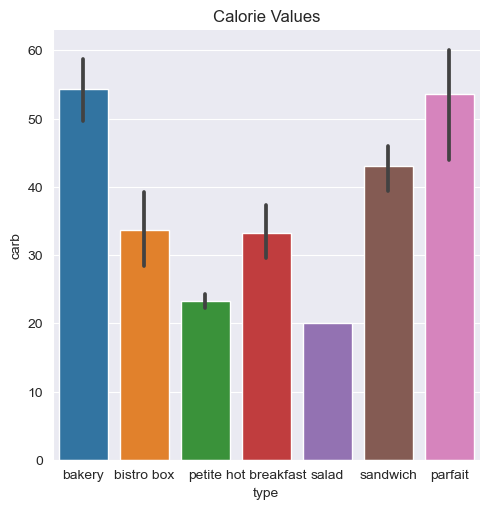

In [61]:
sns.catplot(kind = "bar", x = "type", y = "carb", data = df)
plt.title("Calorie Values")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


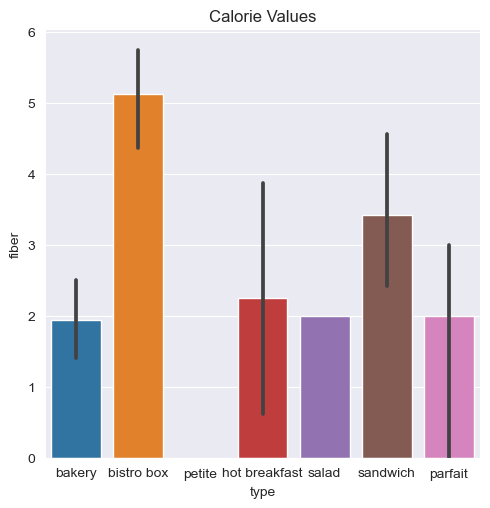

In [63]:
sns.catplot(kind = "bar", x = "type", y = "fiber", data = df)
plt.title("Calorie Values")
plt.show()

In [69]:
df.corr(numeric_only=True)

,calories,fat,carb,fiber,protein
calories,1.000000,0.758682,0.674999,0.260645,0.410398
fat,0.758682,1.000000,0.144547,-0.028549,0.223470
carb,0.674999,0.144547,1.000000,0.213044,-0.050789
fiber,0.260645,-0.028549,0.213044,1.000000,0.488564
protein,0.410398,0.223470,-0.050789,0.488564,1.000000


<Axes: >

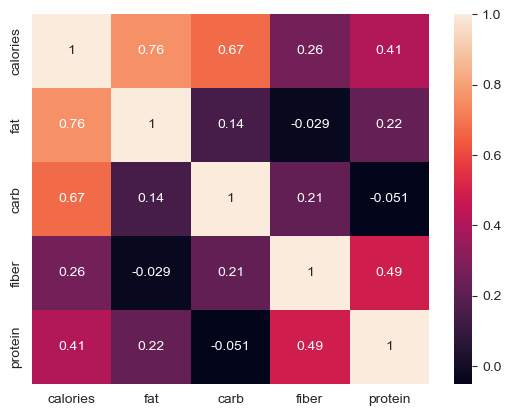

In [71]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: title={'center': 'Correlation of Calorie and Fat Values'}, xlabel='calories', ylabel='fat'>

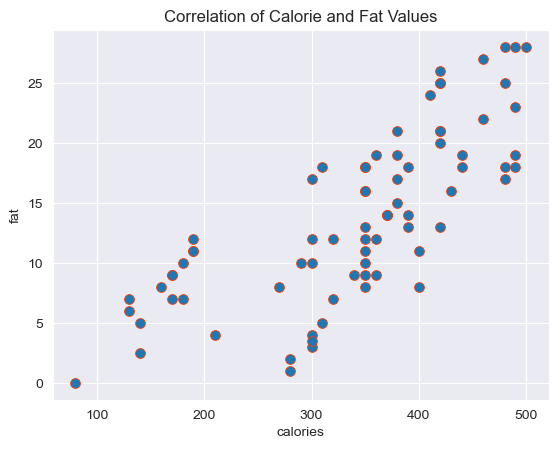

In [81]:
plt.title("Correlation of Calorie and Fat Values")
sns.scatterplot(x = "calories", y = "fat", data = df, s = 50, edgecolor = "#FF3D00")

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


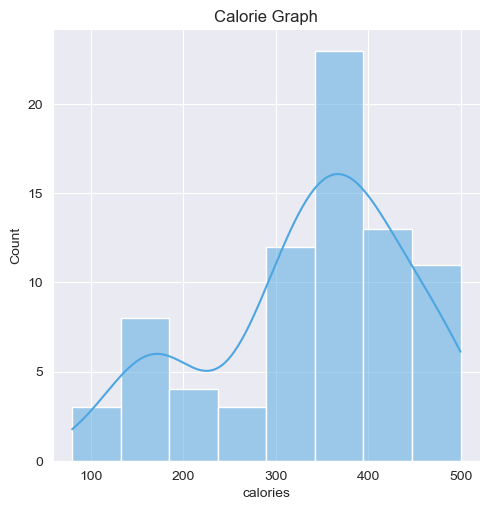

In [83]:
sns.displot(x = "calories", data = df, color = "#4DA6E1", kde = True)
plt.title("Calorie Graph")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


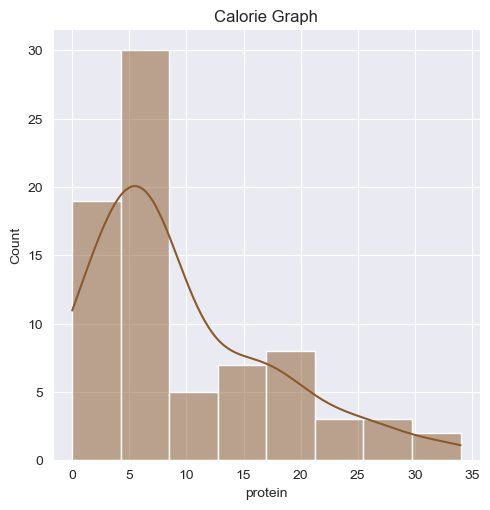

In [85]:
sns.displot(x = "protein", data = df, color = "#8B5A2B", kde = True)
plt.title("Calorie Graph")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


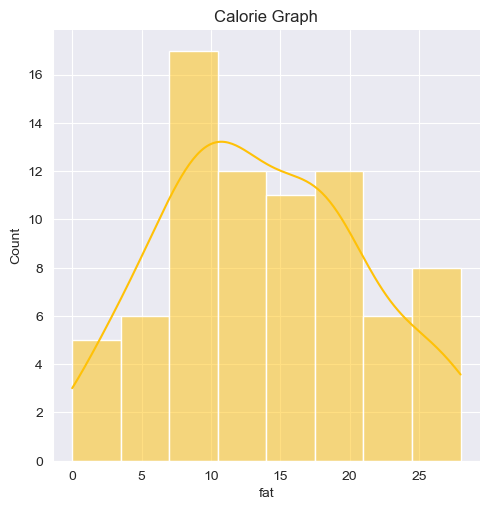

In [87]:
sns.displot(x = "fat", data = df, color = "#FFC107", kde = True)
plt.title("Calorie Graph")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


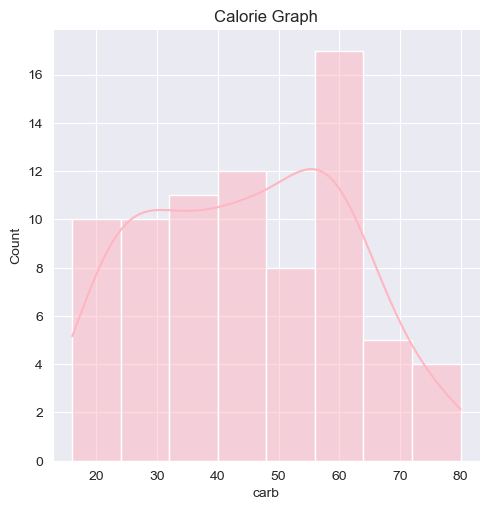

In [93]:

sns.displot(x = "carb", data = df, color = "#FFB6C1", kde = True)
plt.title("Calorie Graph")
plt.show()

In [95]:
df.head()

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [105]:
x = df[["calories","fat","carb","fiber","protein"]]
y = df[["type"]]

In [107]:
x

,calories,fat,carb,fiber,protein
1,350,8.0,67,5,10
2,350,9.0,64,7,6
3,420,20.0,59,0,5
4,490,19.0,75,4,7
5,130,6.0,17,0,0
...,...,...,...,...,...
73,420,13.0,46,6,32
74,390,13.0,36,2,34
75,300,12.0,44,0,8
76,300,4.0,57,3,10


In [109]:
y

,type
1,bakery
2,bakery
3,bakery
4,bakery
5,bakery
...,...
73,sandwich
74,sandwich
75,parfait
76,parfait


In [111]:
x_train,xtest,y_train,ytest = train_test_split(x,y,test_size = 0.2, random_state = 50)

In [113]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [115]:
y_pred = model.predict(xtest)

In [117]:
accuracy = accuracy_score(ytest, y_pred)

In [119]:
print("Accuracy: ", accuracy)

Accuracy:  0.625


In [155]:
prediction = model.predict([[420, 13, 46, 6, 32]]) # Tarragon Chicken Salad Sandwich

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [157]:
print(prediction)

['sandwich']


In [159]:
prediction2 = model.predict([[350, 16, 31, 0, 20]]) # Ham & Cheddar Artisan Breakfast Sandwich

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [161]:
print(prediction2)

['hot breakfast']


In [163]:
prediction3 = model.predict([[440, 19, 63, 0, 6]]) # Starbucks Classic Coffee Cake

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [165]:
print(prediction3)

['bakery']


In [177]:
prediction4 = model.predict([[320,14,30,5,18]]) # Food not on the Starbucks menu : Spinach & Feta Breakfast Wrap | Expected category : hot breakfast

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [179]:
print(prediction4)

['hot breakfast']


In [141]:
from sklearn.tree import plot_tree

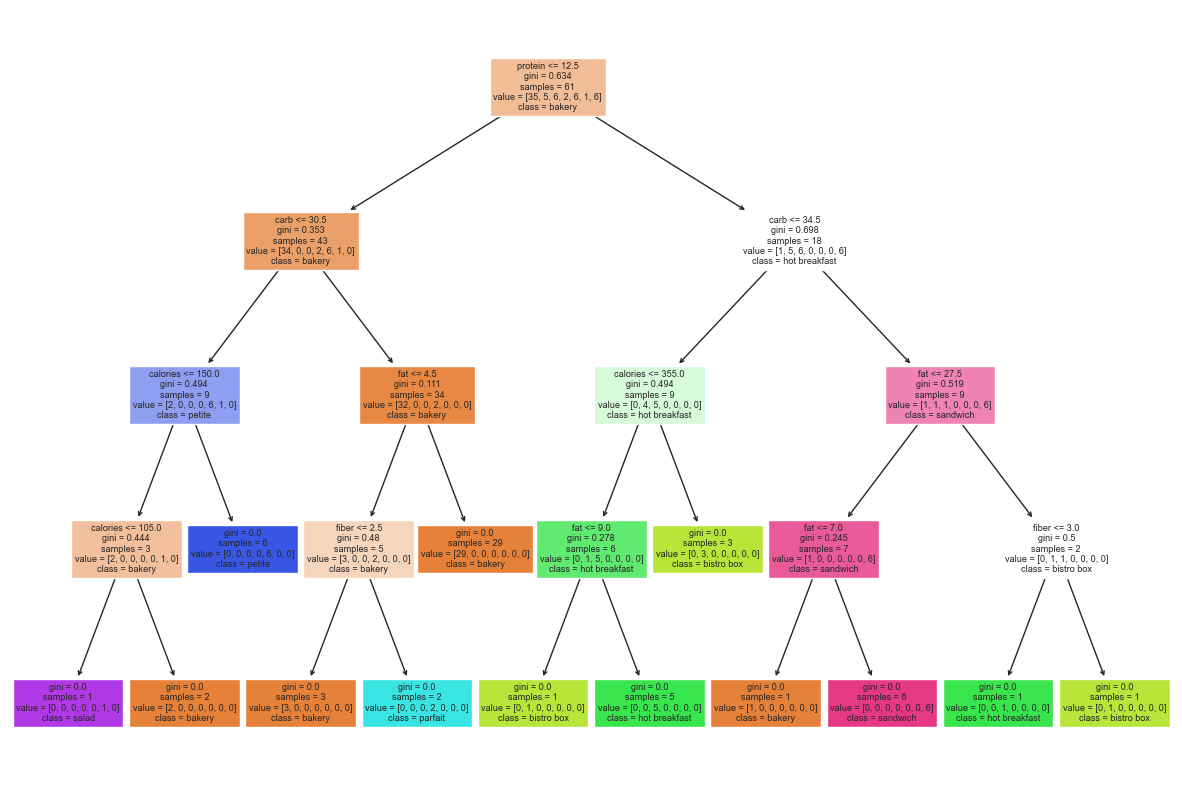

In [147]:
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=x.columns.tolist(), class_names=model.classes_.tolist(), filled=True)
plt.show()